Inércia média nos folds: 8902.8485808675
Inércia por fold: [8651.334873130763, 8830.250459574709, 8915.201297129202, 9069.71998169825, 9047.73629280458]


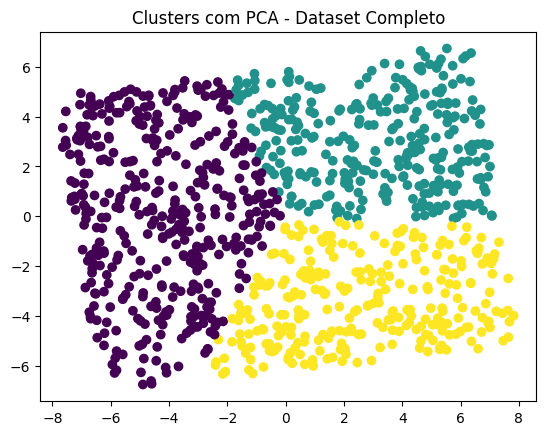

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dados = pd.read_csv('wine.csv')
dados = dados.drop(columns=['id'])

channel_dict = {"low": 0, "medium": 1, "high": 2}
dados['quality'] = dados["quality"].map(channel_dict)

# Preencher NaNs com a média da coluna correspondente
dados = dados.fillna(dados.mean())

X = dados.drop(columns=['quality']).to_numpy()
y = dados['quality'].to_numpy()

# Aplicar PCA em todo o dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

inertia_scores = []

for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]

    model = KMeans(n_clusters=3, random_state=42)
    model.fit(X_train)

    inertia_scores.append(model.inertia_)  # soma das distâncias quadradas dentro dos clusters

print("Inércia média nos folds:", np.mean(inertia_scores))
print("Inércia por fold:", inertia_scores)

# Para visualização, treina KMeans no dataset todo e plota
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_pca)
labels = model.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Clusters com PCA - Dataset Completo")
plt.show()

from sklearn.metrics import silhouette_score




Inércia: 14736.023973531592


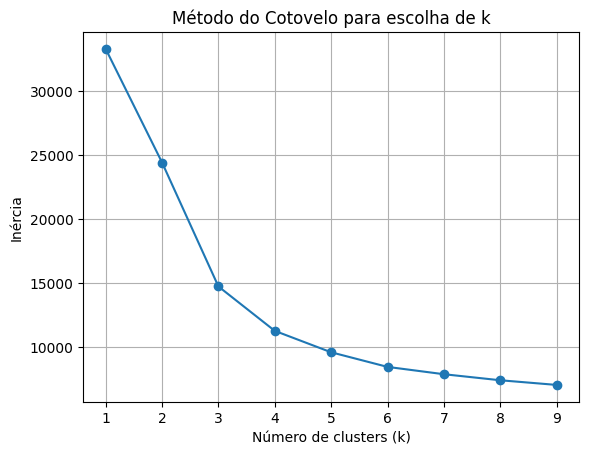

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(dados)
print("Inércia:", model.inertia_)

inertias = []
k_values = range(1, 10)

for k in k_values:
		# Criar uma instância KMeans com k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    # Treinar (fit) o modelo para as amostras
    model.fit(dados)
    # Concatenar (append) a inércia a lista de inércias
    inertias.append(model.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para escolha de k")
plt.grid(True)
plt.show()